<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/ipl_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/modelling_final.csv')

In [34]:
data=df.copy()

In [63]:
data

,season,match_id,innings_id,batsman1_name,home_team,away_team,current_innings,over,ball,runs,wicket_id,wkt_batsman_runs,cumulative_runs,run_rate,wickets_lost,home_teams,away_teams,time
0,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,1,0,0.0,0.0,0,0.000000,0,0,5,1.1
1,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,2,1,0.0,0.0,1,0.909091,0,0,5,1.2
2,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,3,0,0.0,0.0,1,0.909091,0,0,5,1.3
3,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,4,1,0.0,0.0,2,1.818182,0,0,5,1.4
4,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,5,0,0.0,0.0,2,1.818182,0,0,5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236400,2008.0,336016,1,Virat Kohli,KXIP,RCB,4,3,4,1,0.0,0.0,6,1.935484,1,10,4,3.4
236401,2008.0,336016,1,Misbah-ul-Haq,KXIP,RCB,4,3,5,4,0.0,0.0,10,3.225806,1,10,4,3.5
236402,2008.0,336016,1,Misbah-ul-Haq,KXIP,RCB,4,3,6,4,0.0,0.0,14,4.516129,1,10,4,3.6
236403,2008.0,336016,1,Virat Kohli,KXIP,RCB,4,4,1,4,0.0,0.0,18,4.390244,1,10,4,4.1


In [35]:
data['time'] = data['over'] + data['ball'] / 10

In [36]:
match_id = data['match_id'].iloc[0]

In [37]:
innings_id = 1

In [38]:
filtered_data = data[(data['match_id'] == match_id) & (data['innings_id'] == innings_id)]

In [39]:
time_series_data = filtered_data[['time', 'cumulative_runs']].sort_values(by='time')
time_series_data

,time,cumulative_runs
0,1.1,0
1,1.2,1
2,1.3,1
3,1.4,2
4,1.5,2
...,...,...
116,20.2,167
117,20.3,173
118,20.4,177
119,20.5,177


In [40]:
time_series_data = time_series_data.set_index('time')

In [41]:
cumulative_runs = time_series_data['cumulative_runs']

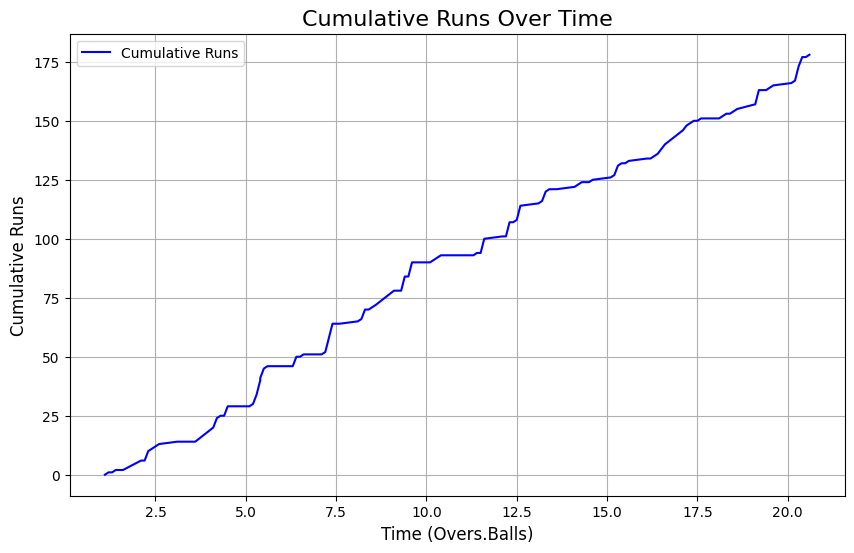

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_runs, label='Cumulative Runs', color='blue')
plt.title('Cumulative Runs Over Time', fontsize=16)
plt.xlabel('Time (Overs.Balls)', fontsize=12)
plt.ylabel('Cumulative Runs', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [43]:
cumulative_runs.index = range(len(cumulative_runs))

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [45]:
result = adfuller(cumulative_runs)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing will be applied.")

ADF Statistic: -0.17508154531841225
p-value: 0.9414273830852045
The series is not stationary. Differencing will be applied.


In [46]:
if result[1] >= 0.05:
    cumulative_runs_diff = cumulative_runs.diff().dropna()
else:
    cumulative_runs_diff = cumulative_runs

In [47]:
res= adfuller(cumulative_runs_diff)
print("ADF Statistic:", res[0])
print("p-value:", res[1])
if res[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing will be applied.")

ADF Statistic: -10.995320439383304
p-value: 6.89466504959311e-20
The series is stationary.


In [48]:
train_size = int(len(cumulative_runs_diff) * 0.8)

In [49]:
train = cumulative_runs_diff.iloc[:train_size]

In [50]:
test = cumulative_runs_diff.iloc[train_size:]

In [51]:
model = ARIMA(train, order=(1, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [52]:
fitted_model = model.fit()

In [53]:
forecast = fitted_model.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [54]:
# Revert differencing if applied (optional, for interpretability)
if result[1] >= 0.05:
    forecast_cumulative = np.cumsum(forecast) + cumulative_runs.iloc[train_size - 1]
else:
    forecast_cumulative = forecast

In [55]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

In [56]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 3.5190215142525134
Mean Absolute Error (MAE): 1.3135514177432819


In [57]:
forecast_cumulative = fitted_model.forecast(steps=len(cumulative_runs[train_size:]))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
print("Length of forecast_cumulative:", len(forecast_cumulative))
print("Length of cumulative_runs[train_size:]:", len(cumulative_runs[train_size:]))

Length of forecast_cumulative: 25
Length of cumulative_runs[train_size:]: 25


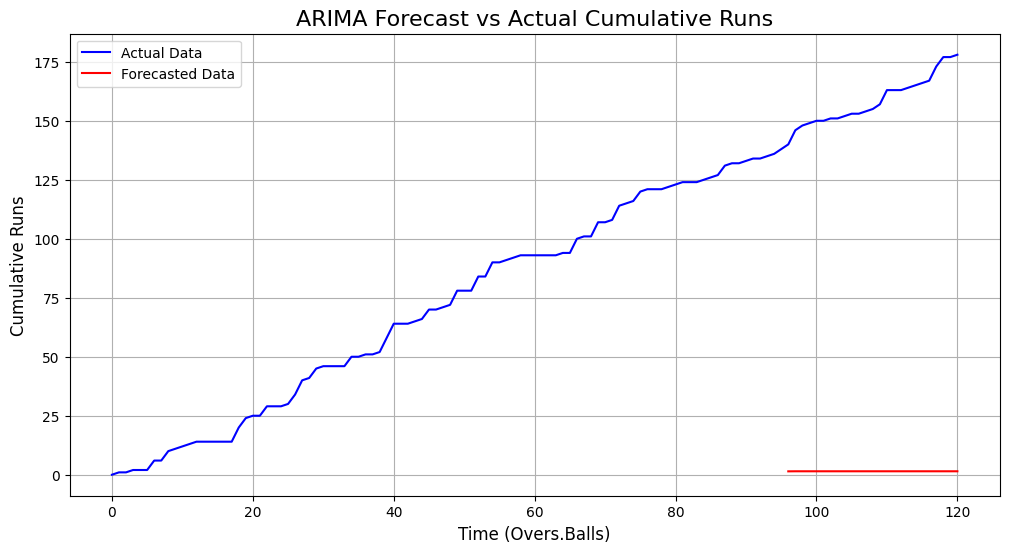

In [59]:
if len(forecast_cumulative) == len(cumulative_runs[train_size:]):
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_runs, label='Actual Data', color='blue')
    plt.plot(cumulative_runs.index[train_size:], forecast_cumulative, label='Forecasted Data', color='red')
    plt.title('ARIMA Forecast vs Actual Cumulative Runs', fontsize=16)
    plt.xlabel('Time (Overs.Balls)', fontsize=12)
    plt.ylabel('Cumulative Runs', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

In [60]:
future_steps =20

In [61]:
future_forecast = fitted_model.forecast(steps=future_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
future_forecast

,predicted_mean
96,1.430902
97,1.459659
98,1.458206
99,1.458279
100,1.458276
101,1.458276
102,1.458276
103,1.458276
104,1.458276
105,1.458276
